In [11]:
import numpy as np
import matplotlib.pyplot as plt

If the point is correctly classified, do nothing.

If the point is classified positive, but it has a negative label, subtract \alpha p, \alpha q,αp,αq, and \alphaα from w_1, w_2, and bb respectively.

If the point is classified negative, but it has a positive label, add \alpha p, \alpha q,αp,αq, and \alphaα to w_1, w_2, and bb respectively.

In [3]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        yhat = prediction(X[i], W, b)
        if yhat == 1 and y[i] == 0:
            # print(W.shape, (learn_rate * X[i]).shape)
            # print(W, (learn_rate * X[i]))
            W -= (learn_rate * X[i])[:,None]
            b -= learn_rate
        elif yhat == 0 and y[i] == 1:
            W += (learn_rate * X[i])[:,None]
            b += learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

(1000, 2) (1000, 1)


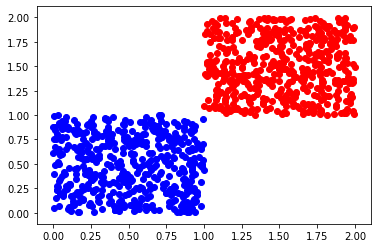

In [15]:
X_pos, y_pos = np.random.random((500,2)) + 1, np.array([[1 for x in range(500)]]).T
X_neg, y_neg = np.random.random((500,2))    , np.array([[0 for x in range(500)]]).T
X, y = np.concatenate([X_pos, X_neg], axis = 0), np.concatenate([y_pos, y_neg], axis = 0)
print(X.shape, y.shape)
plt.scatter(X_pos[:,0], X_pos[:,1], color = 'red')
plt.scatter(X_neg[:,0], X_neg[:,1], color = 'blue')
plt.show()
plt.close()

In [16]:
boundary_lines = trainPerceptronAlgorithm(X, y)

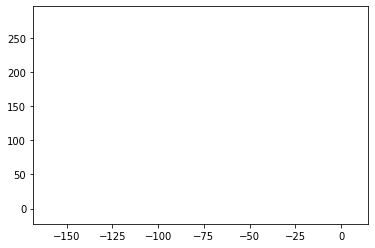

In [17]:
for i in range(len(boundary_lines)):
    plt.plot(boundary_lines[i][0], boundary_lines[i][1])
plt.show()
plt.close()

In [21]:
boundary_lines[0][0][0]

-1.005288434430753

In [22]:
boundary_lines[0][1][0]

0.3137995485072726